# Data Training

In [1]:
from os.path import join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

### Reading Data

In [2]:
loan_data = pd.read_csv(join('..', 'dataset', 'loan_approval_dataset.csv'))
loan_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   is_graduated              4269 non-null   bool 
 3   self_employed             4269 non-null   bool 
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: bool(2), int64(11)
memory usage: 375.3 KB


### Train Test Split

In [3]:
X = loan_data.drop(columns=['loan_status','loan_id','no_of_dependents','commercial_assets_value','luxury_assets_value'])
y = loan_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print(f'{len(X_train) = }\n{len(X_test) = }\n{len(y_train) = }\n{len(y_test) = }')

len(X_train) = 3415
len(X_test) = 854
len(y_train) = 3415
len(y_test) = 854


### Data Training

In [5]:
rf_loan_prediction_model = RandomForestClassifier(max_depth=10, random_state = 20)
rf_loan_prediction_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=20)

In [6]:
testing_prediction = rf_loan_prediction_model.predict(X_test)
testing_data_accuracy = accuracy_score(testing_prediction, y_test)

testing_data_accuracy

0.9730679156908665

In [7]:
# Generating Confusion Matrix using Prediction value
c_matrix = confusion_matrix(y_test, y_pred=testing_prediction)
c_matrix

array([[303,  15],
       [  8, 528]], dtype=int64)

[]

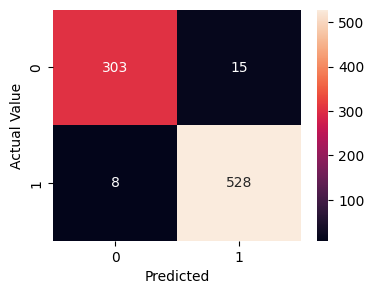

In [8]:
# Generation Heatmap of Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(c_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual Value')
plt.plot()

### Saving Model

In [9]:
path = join('..', 'model', 'loan_approval_models.pkl')

with open(path, 'wb') as file:
    pickle.dump(rf_loan_prediction_model, file)

---